<h1>Análisis Exploratorio de Datos(EDA) para STEAM</h1>

In [3]:
# importar bibliotecas:
import pandas as pd
import numpy as np
import re
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

  
  <p>
    Iniciaremos nuestra investigación con un análisis exploratorio de datos (EDA) sobre los conjuntos de datos relacionados con la empresa STEAM. 
    EDA es un paso esencial en nuestro proceso, ya que nos permitirá comprender en profundidad la naturaleza de los datos y allanar el camino para la posterior implementación de nuestros modelos de machine learning.
  </p>
  <p>
    Durante esta fase inicial, exploraremos detenidamente los datos, identificaremos tendencias, patrones y relaciones entre las variables. Esto nos brindará una visión integral de la información contenida en los conjuntos de datos de STEAM, lo que resultará fundamental para tomar decisiones informadas en las etapas posteriores de nuestro proyecto.
  </p>
  <p>
    Nuestro objetivo principal en esta etapa del proceso es comprender los datos en su totalidad, lo que nos permitirá abordar eficazmente el modelado de machine learning y desarrollar estrategias de recomendación de juegos altamente efectivas. A medida que avanzamos en el EDA, estaremos listos para realizar un modelado más preciso y construir un sistema de recomendación sólido para los usuarios de STEAM.
  </p>


In [4]:
import pandas as pd
# Leemos el Dataset que venimos trabajando en (ETL) ya modificado.
df_review= pd.read_csv('..\\Datos_csv\\aus_reviews_EDA.csv')

In [5]:
df_review.head()

,user_id,funny,item_id,helpful,recommend,review
0,Wackky,1 person found this review funny,550,1 of 1 people (100%) found this review helpful,True,This game is fantastic if you are looking to D...
1,kevinator23,1 person found this review funny,218620,2 of 5 people (40%) found this review helpful,True,PayDay on the difficulty scale Normal lolwut...
2,Lord_Exploit,1 person found this review funny,311560,6 of 10 people (60%) found this review helpful,True,So after odd hours i thought id write a reaso...
3,76561198141443390,3 people found this review funny,730,3 of 4 people (75%) found this review helpful,True,Game is very fun and very enjoyable
4,2768820078,2 people found this review funny,310950,2 of 3 people (67%) found this review helpful,True,lphappy


In [6]:
df_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1160 entries, 0 to 1159
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   user_id    1160 non-null   object
 1   funny      1160 non-null   object
 2   item_id    1160 non-null   int64 
 3   helpful    1160 non-null   object
 4   recommend  1160 non-null   bool  
 5   review     1152 non-null   object
dtypes: bool(1), int64(1), object(4)
memory usage: 46.6+ KB


In [7]:
# La siguiente función inspecciona los datos e identifica  valores nulos en todas las columnas.

def data_inspeccion(variables):
    print(f'Shape: {variables.shape}')
    print(f'\nDatos faltantes:')
    for columna in variables.columns:
        cantidad_nulos = variables[columna].isnull().sum()
        print(f'{columna}: {cantidad_nulos} valores nulos')

data_inspeccion(df_review)


Shape: (1160, 6)

Datos faltantes:
user_id: 0 valores nulos
funny: 0 valores nulos
item_id: 0 valores nulos
helpful: 0 valores nulos
recommend: 0 valores nulos
review: 8 valores nulos


In [8]:
# Voy a visualizar solo la columna "review" con valores nulos para conocer que tipo de datos son.
columna_review_nulos = df_review.loc[df_review['review'].isnull(), 'review']

print(columna_review_nulos)


383     NaN
527     NaN
579     NaN
590     NaN
633     NaN
842     NaN
1105    NaN
1110    NaN
Name: review, dtype: object


In [9]:
# Eliminare las filas con valores nulos 
df_review.dropna(inplace=True)

# Visualizó
data_inspeccion(df_review)

Shape: (1152, 6)

Datos faltantes:
user_id: 0 valores nulos
funny: 0 valores nulos
item_id: 0 valores nulos
helpful: 0 valores nulos
recommend: 0 valores nulos
review: 0 valores nulos


In [10]:
df_review.head()

,user_id,funny,item_id,helpful,recommend,review
0,Wackky,1 person found this review funny,550,1 of 1 people (100%) found this review helpful,True,This game is fantastic if you are looking to D...
1,kevinator23,1 person found this review funny,218620,2 of 5 people (40%) found this review helpful,True,PayDay on the difficulty scale Normal lolwut...
2,Lord_Exploit,1 person found this review funny,311560,6 of 10 people (60%) found this review helpful,True,So after odd hours i thought id write a reaso...
3,76561198141443390,3 people found this review funny,730,3 of 4 people (75%) found this review helpful,True,Game is very fun and very enjoyable
4,2768820078,2 people found this review funny,310950,2 of 3 people (67%) found this review helpful,True,lphappy


<h3> En la consignia del proyecto se me ha asignado hacer una columna de sentimiento para mi Dataset 'aus_review_EDA', en estas siguientes lineas visualizare el proceso de como poder hacerlo usando la libreria 'TextBlob' y a continuación utilizar el metodo .skew() para ver la asimetría de mi columna de sentimiento. </h3>

In [11]:
# Crear una función para realizar el análisis de sentimiento
def analisis_sentimiento(review):
    analisis = TextBlob(str(review))
    # Clasificar la polaridad de la reseña
    if analisis.sentiment.polarity > 0:
        return 2  # Positivo
    elif analisis.sentiment.polarity < 0:
        return 0  # Malo
    else:
        return 1  # Neutral

# Aplicar el análisis de sentimiento a la columna 'review' y crear 'sentiment_analysis'
df_review['sentiment_analysis'] = df_review['review'].apply(analisis_sentimiento)

# Reemplazar la columna 'review' con 'sentiment_analysis'
df_review.drop(columns=['review'], inplace=True)

# Rellenar con 1 si la reseña está ausente
df_review['sentiment_analysis'].fillna(1, inplace=True)



In [12]:
df_review.head(10)

,user_id,funny,item_id,helpful,recommend,sentiment_analysis
0,Wackky,1 person found this review funny,550,1 of 1 people (100%) found this review helpful,True,1
1,kevinator23,1 person found this review funny,218620,2 of 5 people (40%) found this review helpful,True,0
2,Lord_Exploit,1 person found this review funny,311560,6 of 10 people (60%) found this review helpful,True,2
3,76561198141443390,3 people found this review funny,730,3 of 4 people (75%) found this review helpful,True,2
4,2768820078,2 people found this review funny,310950,2 of 3 people (67%) found this review helpful,True,1
5,1337lolroflmao,1 person found this review funny,219740,1 of 2 people (50%) found this review helpful,True,2
6,Mastic,16 people found this review funny,304050,95 of 173 people (55%) found this review helpful,False,0
7,Mastic,1 person found this review funny,550,1 of 1 people (100%) found this review helpful,True,2
8,76561198104393251,1 person found this review funny,304930,No ratings yet,True,1
9,H1DD3NT3RR0R,1 person found this review funny,730,1 of 3 people (33%) found this review helpful,True,0


In [13]:
# Visualizó las estadísticas resumidas de columnas numéricas
df_review.describe() 

,item_id,sentiment_analysis
count,1152.000000,1152.000000
mean,201075.483507,1.201389
std,146584.550344,0.896599
min,20.000000,0.000000
25%,12210.000000,0.000000
50%,230775.000000,2.000000
75%,316367.500000,2.000000
max,516040.000000,2.000000


In [14]:

asimetria = df_review['sentiment_analysis'].skew()

'''Voy a calcular la asimetría de mi columna de Sentimiento
para observar si hay mas valores nulos,negativos o positivos'''

print(f'Asimetría de la columna "sentiment_analysis": {asimetria}')

Asimetría de la columna "sentiment_analysis": -0.4062379869577047


* Ahora es el turno del Dataset 'items', para analizar su naturaleza y hacerle una limpieza, para el modelamiento.

In [15]:
df_items = pd.read_csv('..\\Datos_csv\\aus_items_EDA.csv')
df_items.head()

,user_id,items_count,item_id,item_name,playtime_forever,playtime_2weeks
0,76561197970982479,277,10,CounterStrike,6,0
1,76561197970982479,277,20,Team Fortress Classic,0,0
2,76561197970982479,277,30,Day of Defeat,7,0
3,76561197970982479,277,40,Deathmatch Classic,0,0
4,76561197970982479,277,50,HalfLife Opposing Force,0,0


In [16]:
# Usare la misma  función para inspeccionar los datos e identificar valores nulos

def data_inspeccion(variables):
    print(f'Shape: {variables.shape}')
    print(f'\nDatos faltantes:')
    for columna in variables.columns:
        cantidad_nulos = variables[columna].isnull().sum()
        print(f'{columna}: {cantidad_nulos} valores nulos')

data_inspeccion(df_items)


Shape: (5094105, 6)

Datos faltantes:
user_id: 0 valores nulos
items_count: 0 valores nulos
item_id: 0 valores nulos
item_name: 1090 valores nulos
playtime_forever: 0 valores nulos
playtime_2weeks: 0 valores nulos


In [17]:
# Analizo la columna 'item_name' en busca de valores nulos
columna_item_name = df_items['item_name'] # Selecciono la columna 'item_name'
valores_nulos = columna_item_name.isnull().sum()  # Cuento la cantidad de valores nulos en la columna

# Muestro la cantidad de valores nulos y los primeros valores no nulos en la columna
print(f"Valores nulos en la columna 'item_name': {valores_nulos}")
print("\nPrimeros valores no nulos en la columna:")
print(columna_item_name.dropna().head())  # Muestro los primeros valores no nulos

Valores nulos en la columna 'item_name': 1090

Primeros valores no nulos en la columna:
0              CounterStrike
1      Team Fortress Classic
2              Day of Defeat
3         Deathmatch Classic
4    HalfLife Opposing Force
Name: item_name, dtype: object


In [18]:
# Eliminare las filas con valores nulos en todo el DataFrame
df_items.dropna(inplace=True)

# Verifico que se hayan eliminado
valores_nulos_despues = df_items.isnull().sum()

# Muestro la cantidad de valores nulos después de eliminarlos
print("Valores nulos en el DataFrame después de eliminarlos:")
print(valores_nulos_despues)


Valores nulos en el DataFrame después de eliminarlos:
user_id             0
items_count         0
item_id             0
item_name           0
playtime_forever    0
playtime_2weeks     0
dtype: int64


In [19]:
# include='all' proporciona un resumen adicional de los datos
df_items.describe(include='all')

,user_id,items_count,item_id,item_name,playtime_forever,playtime_2weeks
count,5093015,5.093015e+06,5.093015e+06,5093015,5.093015e+06,5.093015e+06
unique,70912,NaN,NaN,10730,NaN,NaN
top,phrostb,NaN,NaN,Dota Test,NaN,NaN
freq,7760,NaN,NaN,49136,NaN,NaN
mean,NaN,3.156817e+02,1.783790e+05,NaN,9.907150e+02,9.070876e+00
std,NaN,6.968559e+02,1.318627e+05,NaN,5.414788e+03,1.403294e+02
min,NaN,1.000000e+00,1.000000e+01,NaN,0.000000e+00,0.000000e+00
25%,NaN,7.100000e+01,3.445000e+04,NaN,0.000000e+00,0.000000e+00
50%,NaN,1.370000e+02,2.144200e+05,NaN,3.400000e+01,0.000000e+00
75%,NaN,2.750000e+02,2.664300e+05,NaN,3.550000e+02,0.000000e+00


In [20]:
df_items.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5093015 entries, 0 to 5094104
Data columns (total 6 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   user_id           object
 1   items_count       int64 
 2   item_id           int64 
 3   item_name         object
 4   playtime_forever  int64 
 5   playtime_2weeks   int64 
dtypes: int64(4), object(2)
memory usage: 272.0+ MB


* Ahora revisare el Dataframe 'steam_games_EDA'

In [21]:
df_games = pd.read_csv('..\\Datos_csv\\steam_games_EDA.csv')

In [22]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22396 entries, 0 to 22395
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   publisher     22361 non-null  object
 1   genres        22396 non-null  object
 2   app_name      22377 non-null  object
 3   title         22377 non-null  object
 4   release_date  22396 non-null  object
 5   tags          22396 non-null  object
 6   specs         22396 non-null  object
 7   price         22396 non-null  object
 8   developer     22349 non-null  object
dtypes: object(9)
memory usage: 1.5+ MB


In [23]:
# Usare la misma  función para inspeccionar los datos e identificar valores nulos

def data_inspeccion(variables):
    print(f'Shape: {variables.shape}')
    print(f'\nDatos faltantes:')
    for columna in variables.columns:
        cantidad_nulos = variables[columna].isnull().sum()
        print(f'{columna}: {cantidad_nulos} valores nulos')

data_inspeccion(df_games)


Shape: (22396, 9)

Datos faltantes:
publisher: 35 valores nulos
genres: 0 valores nulos
app_name: 19 valores nulos
title: 19 valores nulos
release_date: 0 valores nulos
tags: 0 valores nulos
specs: 0 valores nulos
price: 0 valores nulos
developer: 47 valores nulos


In [24]:
# Eliminare las filas con valores nulos en todo el DataFrame
df_games.dropna(inplace=True)

# Verifico que se hayan eliminado
valores_nulos_despues = df_games.isnull().sum()

# Muestro la cantidad de valores nulos después de eliminarlos
print("Valores nulos en el DataFrame después de eliminarlos:")
print(valores_nulos_despues)


Valores nulos en el DataFrame después de eliminarlos:
publisher       0
genres          0
app_name        0
title           0
release_date    0
tags            0
specs           0
price           0
developer       0
dtype: int64


In [25]:
df_games.describe()

,publisher,genres,app_name,title,release_date,tags,specs,price,developer
count,22332,22332,22332,22332,22332,22332,22332,22332,22332
unique,7757,803,21872,21872,3209,12404,3311,132,10170
top,Ubisoft,Action,Train Simulator BR Class Loco AddOn,Train Simulator BR Class Loco AddOn,2012-10-16,Simulation,Singleplayer,9.99,Dovetail Games
freq,366,1540,12,12,100,939,2622,3160,251


<h4>Realizaré un análisis exploratorio de mis DataFrames con el objetivo de evaluar la calidad de los datos y detectar posibles valores atípicos. Esta exploración inicial es crucial para comprender la estructura de los conjuntos de datos y garantizar que estén preparados adecuadamente para el análisis subsiguiente. Utilizaré diversas técnicas de visualización para obtener información valiosa que orientará las decisiones futuras.

Primero, crearé un histograma para la columna 'sentiment_analysis' en el DataFrame de reseñas. Esto me permitirá visualizar la distribución de sentimientos en las reseñas, lo que es fundamental para comprender cómo se sienten los usuarios con respecto a los juegos.

Luego, generaré un gráfico de dispersión utilizando el DataFrame 'df_items', explorando la relación entre las variables 'playtime_forever' y 'playtime_2weeks'. Esta visualización ayudará a identificar cualquier patrón o relación entre los tiempos de juego a largo plazo y a corto plazo.

Finalmente, investigaré los géneros más comunes en el DataFrame de juegos ('df_games') mediante un gráfico de barras. Esto proporcionará información sobre cuáles son los géneros más populares en los juegos y cuántos de ellos están presentes en el conjunto de datos.

A continuación, se presentan los resultados de estas visualizaciones que ayudarán a guiar el análisis y la toma de decisiones futuras.<br>
Disfruta mucho...</h4>






# Graficar

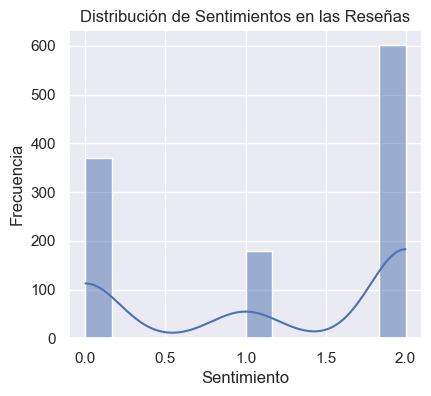

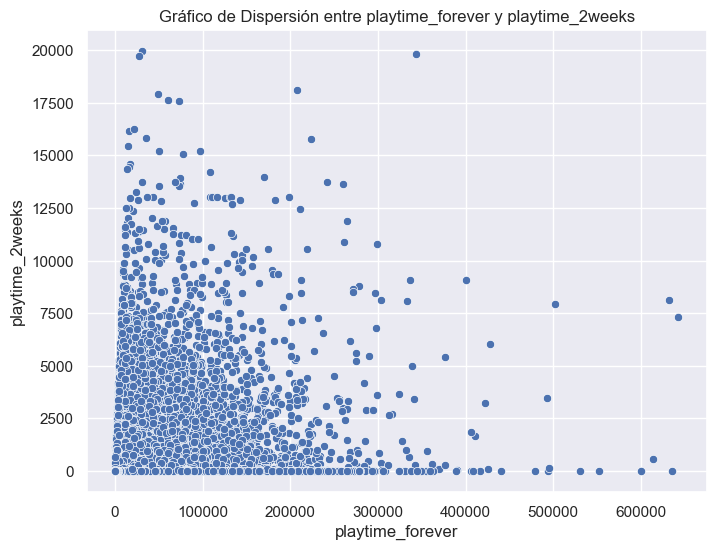

C:\Users\Lenovo G40 80\AppData\Local\Temp\ipykernel_1057296\2877678783.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genres_counts[:10], y=genres_counts.index[:10], palette="viridis")


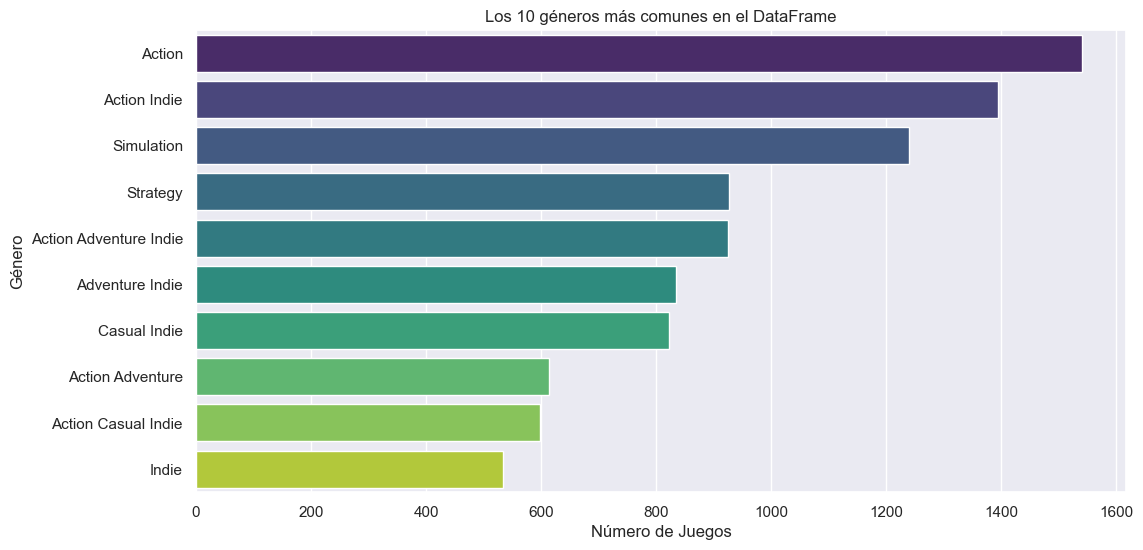

In [26]:
# Creación de un histograma para la columna 'sentiment_analysis'
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.histplot(df_review['sentiment_analysis'], kde=True)
plt.title('Distribución de Sentimientos en las Reseñas')
plt.xlabel('Sentimiento')
plt.ylabel('Frecuencia')
plt.show()

# Crear un gráfico de dispersión para mi Dataframe 'df_items' 
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_items, x='playtime_forever', y='playtime_2weeks')
plt.title('Gráfico de Dispersión entre playtime_forever y playtime_2weeks')
plt.xlabel('playtime_forever')
plt.ylabel('playtime_2weeks')
plt.show()

# Esto agrupa los valores y cuenta cuántas veces aparece cada uno
genres_counts = df_games['genres'].value_counts()

# Voy a crear un gráfico de barras para 'df_games' 
plt.figure(figsize=(12, 6))  # Establece el tamaño del gráfico
sns.barplot(x=genres_counts[:10], y=genres_counts.index[:10], palette="viridis")

# etiquetamos
plt.xlabel("Número de Juegos")
plt.ylabel("Género")
plt.title("Los 10 géneros más comunes en el DataFrame")
plt.show()

### En la visualización previa de mis DataFrames, se identificaron datos atípicos en el DataFrame 'df_items'. Sin embargo, decidí mantener estos valores sin modificar, ya que no parecen tener un impacto perjudicial o significativo en el análisis.

- Voy a crear mis Dataframes para hacer las funciones.

In [27]:
df_games.head(2)

,publisher,genres,app_name,title,release_date,tags,specs,price,developer
0,Kotoshiro,Action Casual Indie Simulation Strategy,Lost Summoner Kitty,Lost Summoner Kitty,2018-01-04,Strategy Action Indie Casual Simulation,Singleplayer,4.99,Kotoshiro
1,Making Fun Inc,Free to Play Indie RPG Strategy,Ironbound,Ironbound,2018-01-04,Free to Play Strategy Indie RPG Card Game Trad...,Singleplayer Multiplayer Online MultiPlayer Cr...,Free To Play,Secret Level SRL


In [28]:
df_items.head(2)

,user_id,items_count,item_id,item_name,playtime_forever,playtime_2weeks
0,76561197970982479,277,10,CounterStrike,6,0
1,76561197970982479,277,20,Team Fortress Classic,0,0


In [29]:
df_review.head(2)

,user_id,funny,item_id,helpful,recommend,sentiment_analysis
0,Wackky,1 person found this review funny,550,1 of 1 people (100%) found this review helpful,True,1
1,kevinator23,1 person found this review funny,218620,2 of 5 people (40%) found this review helpful,True,0


In [30]:
# Selecciono las columnas 'price','genres','developer','release_date' del DataFrame df_games
df_Developers = df_games[['price','genres','developer','release_date']]

# Selecciono la columna 'playtime_forever' del DataFrame df_items
df_items_subset = df_items[['user_id','item_id']]

# Combino las columnas seleccionadas en un nuevo DataFrame
Funcion1 = pd.concat([df_Developers, df_items_subset], axis=1)

In [31]:
Funcion1.to_csv('funcion1_developer.csv', index=False)

In [32]:
# Selecciona las columnas 'price' del DataFrame df_games
df_Funcion2 = df_games[['price']]

# Selecciona la columna 'playtime_forever' del DataFrame df_items
df_items_subset = df_review[['recommend','user_id', 'item_id']]

# Combina las columnas seleccionadas en un nuevo DataFrame
Funcion2 = pd.concat([df_Funcion2, df_items_subset], axis=1)

In [33]:
Funcion2.to_csv('Funcion2_userdata.csv', index=False)

In [34]:
# Selecciono las columnas 'title' y 'release_date' del DataFrame df_games
df_funcion3_genero= df_items[['playtime_2weeks', 'user_id', 'playtime_forever','item_id']]

# Selecciono la columna 'recommend', 'user_id' del DataFrame df_review
df_review_subset = df_games[['genres','release_date']]

# Combino las columnas seleccionadas en un nuevo DataFrame
UsersGenre = pd.concat([df_funcion3_genero, df_review_subset], axis=1)

In [35]:
UsersGenre.to_csv('UsersGenre_funcion3.csv', index=False)

In [36]:
# Selecciono las columnas 'title' y 'release_date' del DataFrame df_games
df_funcion4_BestDeveloper = df_games[['developer', 'title', 'release_date']]

# Selecciono la columna 'recommend', 'user_id' del DataFrame df_review
df_review_subset = df_review[['recommend']]

# Combino las columnas seleccionadas en un nuevo DataFrame
BestDeveloper = pd.concat([df_funcion4_BestDeveloper, df_review_subset], axis=1)

In [37]:
BestDeveloper.to_csv('BestDeveloper_funcion4.csv', index=False)

In [38]:
# Selecciona las columnas 'title' y 'release_date' del DataFrame df_games
df_funcion5_SentimentAnalysis = df_games[['developer','release_date']]

# Selecciona la columna 'recommend', 'user_id' del DataFrame df_review
df_review_subset = df_review[['sentiment_analysis','user_id']]

# Combina las columnas seleccionadas en un nuevo DataFrame
SentimentAnalysis = pd.concat([df_funcion5_SentimentAnalysis, df_review_subset], axis=1)

In [39]:
SentimentAnalysis.to_csv('sentiment_analysis_funcion.csv', index=False)